<a href="https://colab.research.google.com/github/JennaKvasnovsky/Problem-Set-3/blob/main/Problem_Set_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install torch torchvision matplotlib

# Download and extract the dataset
!wget https://gist.githubusercontent.com/JosephKJ/94c7728ed1a8e0cd87fe6a029769cde1/raw/403325f5110cb0f3099734c5edb9f457539c77e9/Oxford-102_Flower_dataset_labels.txt
!wget https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!unzip 'flower_data.zip'


Streaming output truncated to the last 5000 lines.
  inflating: flower_data/train/7/image_07232.jpg  
  inflating: flower_data/train/7/image_08101.jpg  
  inflating: flower_data/train/7/image_07226.jpg  
  inflating: flower_data/train/7/image_07227.jpg  
  inflating: flower_data/train/7/image_08100.jpg  
  inflating: flower_data/train/7/image_07233.jpg  
   creating: flower_data/train/29/
  inflating: flower_data/train/29/image_04152.jpg  
  inflating: flower_data/train/29/image_04147.jpg  
  inflating: flower_data/train/29/image_04153.jpg  
  inflating: flower_data/train/29/image_04151.jpg  
  inflating: flower_data/train/29/image_04150.jpg  
  inflating: flower_data/train/29/image_04144.jpg  
  inflating: flower_data/train/29/image_04140.jpg  
  inflating: flower_data/train/29/image_04154.jpg  
  inflating: flower_data/train/29/image_04155.jpg  
  inflating: flower_data/train/29/image_04141.jpg  
  inflating: flower_data/train/29/image_04157.jpg  
  inflating: flower_data/train/29/im

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import ToPILImage


In [3]:
# Define mean and std for normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define data transformations for training and validation datasets
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Load the training dataset
train_dataset = datasets.ImageFolder(os.path.join('/content/flower_data/', 'train'), transform=train_transform)

# Load the validation dataset
val_dataset = datasets.ImageFolder(os.path.join('/content/flower_data/', 'valid'), transform=val_transform)

# Define batch size for DataLoader
batch_size = 32

# Create DataLoader for training dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Create DataLoader for validation dataset
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [4]:
# Check if a GPU is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True).to(device)

# Replace the last layer with a new fully connected layer
num_classes = len(train_dataset.classes)  # Adjust based on your specific task
alexnet.classifier[6] = torch.nn.Linear(4096, num_classes).to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:09<00:00, 26.4MB/s]


In [5]:
# Set up DataLoader with increased num_workers for parallel data loading
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

# Set up DataLoader for validation dataset
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch 1/10, Training Loss: 0.03987538044014548, Training Accuracy: 65.94932844932845
Epoch 1/10, Validation Accuracy: 83.37408312958435


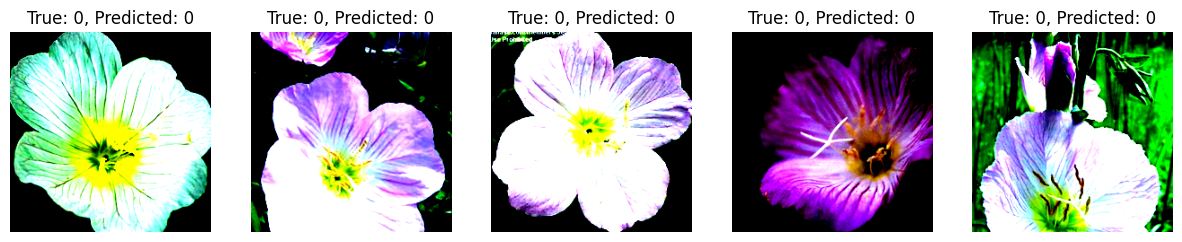

Epoch 2/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 2/10, Training Loss: 0.02954137454466651, Training Accuracy: 73.85531135531136
Epoch 2/10, Validation Accuracy: 85.20782396088019


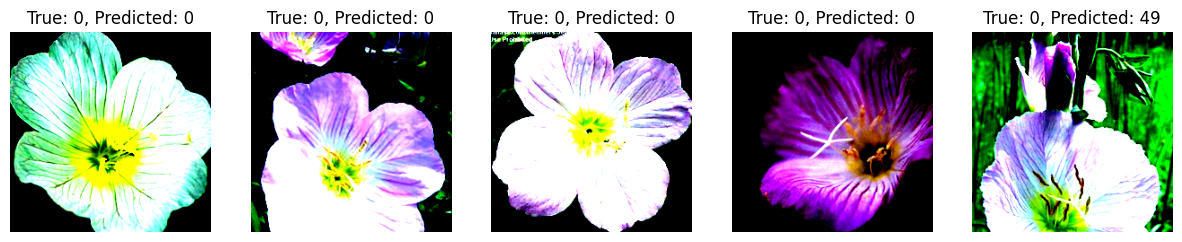

Epoch 3/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 3/10, Training Loss: 0.023432928825454544, Training Accuracy: 78.90720390720391
Epoch 3/10, Validation Accuracy: 86.43031784841075


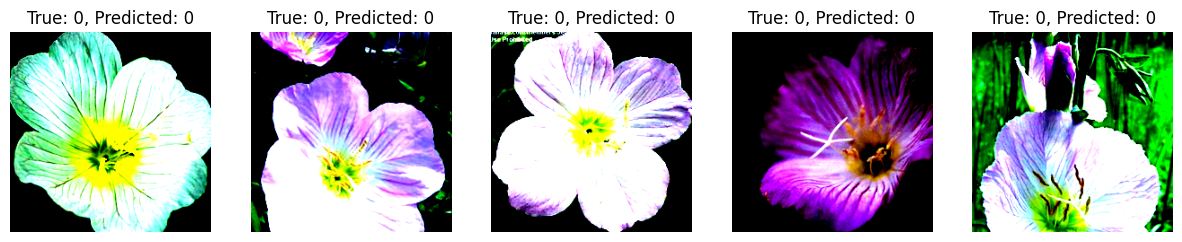

Epoch 4/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 4/10, Training Loss: 0.02152557866431782, Training Accuracy: 80.73870573870573
Epoch 4/10, Validation Accuracy: 85.33007334963325


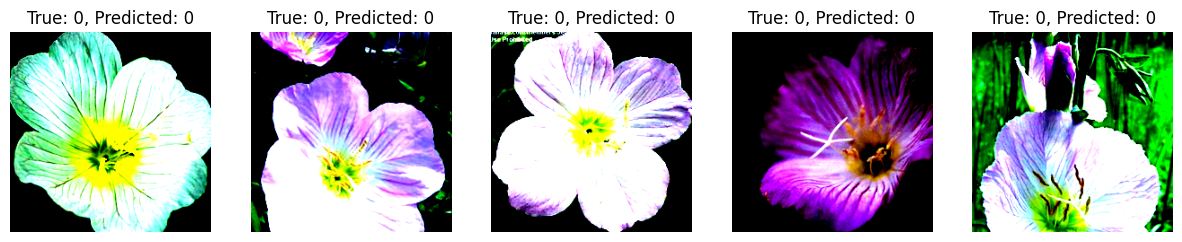

Epoch 5/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 5/10, Training Loss: 0.01954496695213156, Training Accuracy: 82.00549450549451
Epoch 5/10, Validation Accuracy: 86.0635696821516


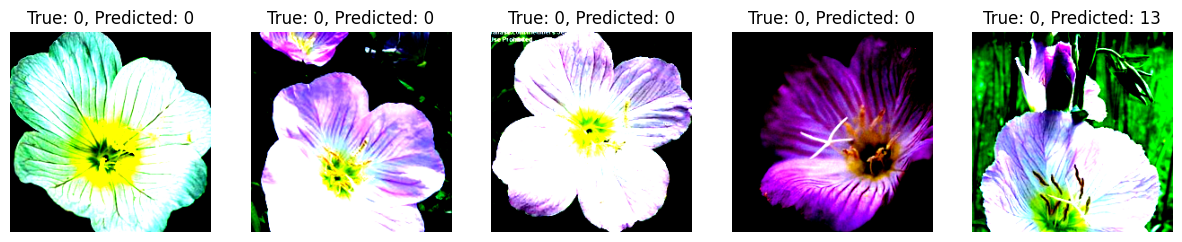

Epoch 6/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 6/10, Training Loss: 0.017697547756872333, Training Accuracy: 83.77594627594628
Epoch 6/10, Validation Accuracy: 86.43031784841075


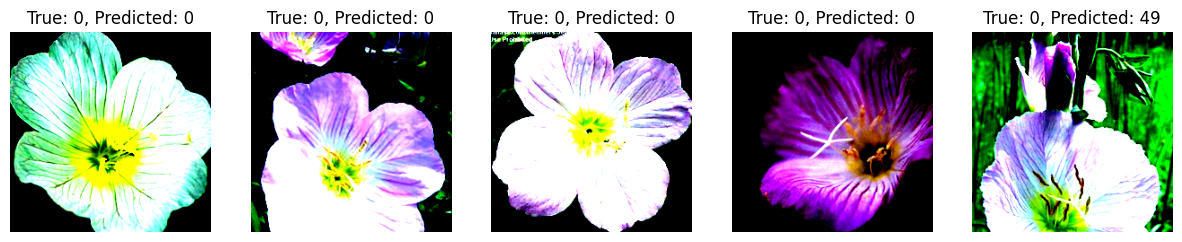

Epoch 7/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 7/10, Training Loss: 0.015372013391174093, Training Accuracy: 85.82112332112332
Epoch 7/10, Validation Accuracy: 88.87530562347189


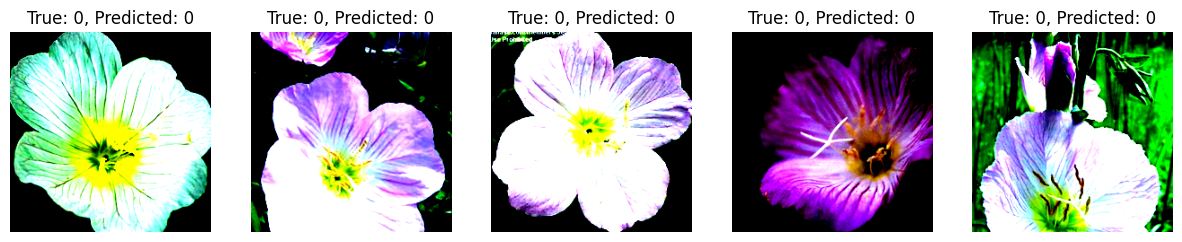

Epoch 8/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 8/10, Training Loss: 0.015892372770241765, Training Accuracy: 85.8974358974359
Epoch 8/10, Validation Accuracy: 89.60880195599022


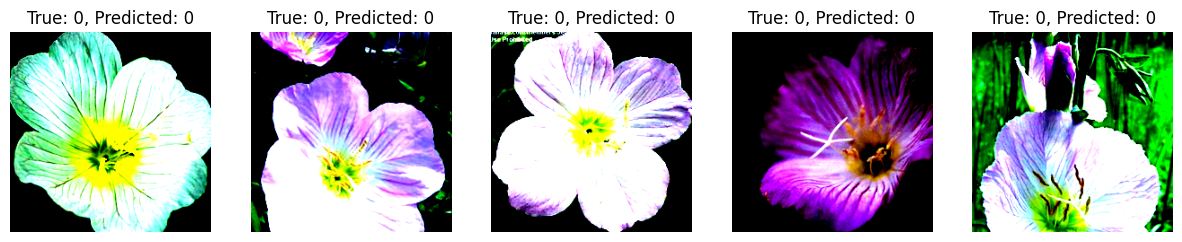

Epoch 9/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 9/10, Training Loss: 0.013379819358565978, Training Accuracy: 87.3931623931624
Epoch 9/10, Validation Accuracy: 90.09779951100245


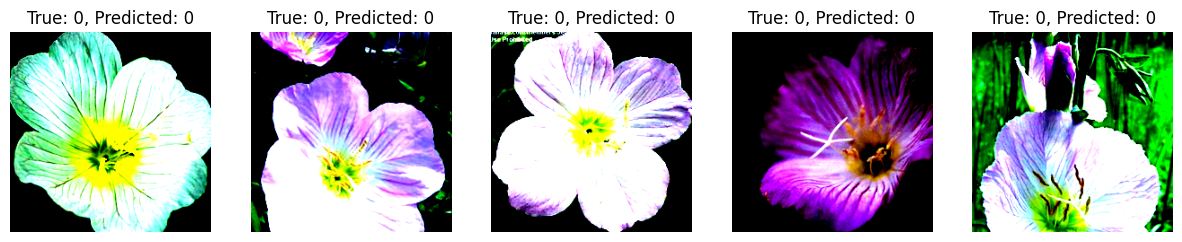

Epoch 10/10, Training Dataset Size: 6552


  0%|          | 0/205 [00:00<?, ?it/s]

Epoch 10/10, Training Loss: 0.012966921682650352, Training Accuracy: 87.97313797313797
Epoch 10/10, Validation Accuracy: 90.58679706601467


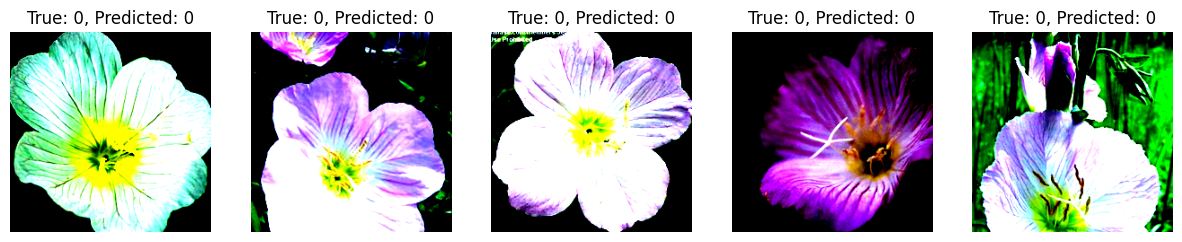

In [7]:
# Training Loop

import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm, trange

num_epochs = 10
for epoch in trange(num_epochs):
    # Training phase
    alexnet.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    print(f"Epoch {epoch + 1}/{num_epochs}, Training Dataset Size: {len(train_loader.dataset)}")

    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = alexnet(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    # Print statistics for the training phase
    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {running_loss / len(train_loader.dataset)}, Training Accuracy: {100 * correct_train / total_train}')


    # Validation phase
    alexnet.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = alexnet(inputs)
            _, predicted_val = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    # Print statistics for the validation phase
    print(f'Epoch {epoch + 1}/{num_epochs}, Validation Accuracy: {100 * correct_val / total_val}')

    # Display a sample of images with true and predicted labels
    sample_images, sample_labels = next(iter(val_loader))
    sample_images, sample_labels = sample_images[:5].to(device), sample_labels[:5].to(device)

    with torch.no_grad():
        outputs = alexnet(sample_images)
        _, predicted_classes = torch.max(outputs, 1)

    # Convert to numpy arrays for visualization
    sample_images = sample_images.cpu().numpy()
    sample_labels = sample_labels.cpu().numpy()
    predicted_classes = predicted_classes.cpu().numpy()

    # Plot the images with true and predicted labels
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axes[i].imshow(np.transpose(sample_images[i], (1, 2, 0)))
        axes[i].set_title(f'True: {sample_labels[i]}, Predicted: {predicted_classes[i]}')
        axes[i].axis('off')

    plt.show()